In [ ]:
#RNN

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


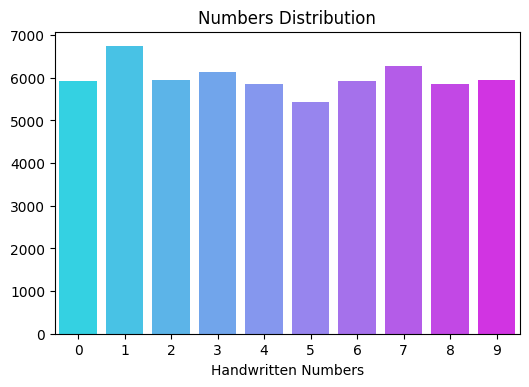

In [ ]:
from keras.datasets import mnist;

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()
import seaborn as sns
import collections
import matplotlib.pyplot as plt

value_count_training = collections.Counter(training_dataset_y)

fig, ax0 = plt.subplots(1, 1, dpi=100)
ax = sns.barplot(list(value_count_training.keys()), list(value_count_training.values()), palette='cool')
ax.set_xlabel('Handwritten Numbers')
ax.set_title("Numbers Distribution")
plt.show();
training_dataset_x = training_dataset_x.reshape(-1, 28 * 28) 
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)


In [ ]:
from keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

In [ ]:
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=28 * 28, activation='relu', name='Hidden-1'))
model.add(Dense(256, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 512)               401920    
                                                                 
 Hidden-2 (Dense)            (None, 256)               131328    
                                                                 
 Output (Dense)              (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 0.2192 - accuracy: 0.9347 - val_loss: 0.1085 - val_accuracy: 0.9676
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0865 - accuracy: 0.9736 - val_loss: 0.1047 - val_accuracy: 0.9663
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0536 - accuracy: 0.9830 - val_loss: 0.0931 - val_accuracy: 0.9718
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0394 - accuracy: 0.9871 - val_loss: 0.1030 - val_accuracy: 0.9714
Epoch 5/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0802 - val_accuracy: 0.9772
CPU times: user 29.5 s, sys: 1.94 s, total: 31.5 s
Wall time: 21.2 s


In [ ]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9777
loss = 0.07320535182952881, accuracy = 0.9776999950408936


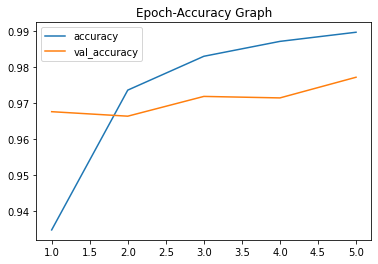

In [ ]:
import matplotlib.pyplot as plt

plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
#CNN

In [ ]:
from keras.datasets import mnist

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)
test_dataset_x = test_dataset_x.reshape(-1, 28, 28, 1)

training_dataset_x = training_dataset_x.astype('float32')
test_dataset_x = test_dataset_x.astype('float32')

In [ ]:
training_dataset_x /= 255
test_dataset_x /= 255


from keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten

from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling2D-1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling2D-2'))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 26, 26, 32)        320       
                                                                 
 MaxPooling2D-1 (MaxPooling2  (None, 13, 13, 32)       0         
 D)                                                              
                                                                 
 Convolution-2 (Conv2D)      (None, 11, 11, 64)        18496     
                                                                 
 MaxPooling2D-2 (MaxPooling2  (None, 5, 5, 64)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 Hidden-1 (Dense)            (None, 128)              

In [ ]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 34s 44ms/step - loss: 0.1906 - accuracy: 0.9416 - val_loss: 0.0681 - val_accuracy: 0.9799
Epoch 2/5
750/750 [==============================] - 26s 35ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0533 - val_accuracy: 0.9833
Epoch 3/5
750/750 [==============================] - 27s 36ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 4/5
750/750 [==============================] - 26s 35ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0492 - val_accuracy: 0.9869
Epoch 5/5
750/750 [==============================] - 30s 39ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0366 - val_accuracy: 0.9898
CPU times: user 3min 45s, sys: 7.51 s, total: 3min 52s
Wall time: 2min 22s


In [ ]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.0292 - accuracy: 0.9911
loss = 0.029193924739956856, accuracy = 0.991100013256073


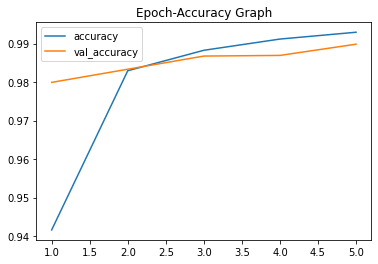

In [ ]:
import matplotlib.pyplot as plt

plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
#different between both accuracy is different so for that CNN is best but it takes some minutes of time but accuracy is more than RNN